<hr style="border-top:5px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:5px solid Silver; margin-top: 0px; margin-bottom: 0px">
<hr style="border-top:5px solid #DC9233; margin-top: 0px; margin-bottom: 0px">

# Medals at the Olympics

<hr style="border-top:5px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:5px solid Silver; margin-top: 0px; margin-bottom: 0px">
<hr style="border-top:5px solid #DC9233; margin-top: 0px; margin-bottom: 0px">

In [1]:
# Standard imports
import pandas as pd
from scipy import stats

# Visulation Imports
import matplotlib.pyplot as plt
import seaborn as sns

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Modeling imports
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression, RFE
import sklearn.preprocessing
import statsmodels.api as sm
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# turn off pink boxes
import warnings
warnings.filterwarnings("ignore")

# Custom Imports
import wrangle
import explore
import model

## Project Goal
- Create a classification model to predict if an olympic athlete will medal or not.

<hr style="border-top:5px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:5px solid Silver; margin-top: 0px; margin-bottom: 0px">
<hr style="border-top:5px solid #DC9233; margin-top: 0px; margin-bottom: 0px">

# Acquire and Prepare

<hr style="border-top:5px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:5px solid Silver; margin-top: 0px; margin-bottom: 0px">
<hr style="border-top:5px solid #DC9233; margin-top: 0px; margin-bottom: 0px">

#### This function reads 2 csv's and assigns them into a dataframe. It then feature engineers 5 new columns, those columns are Medal, Sex_Male, medalist, BMI, and AgeBins. From there it splits the data and imputes the null values for Age, drops data prior to the year 1961, and drops the remaining nulls.

In [2]:
df, df1, train, validate, test = wrangle.wrangle_df()

In [3]:
train.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Sex_Male,medalist,BMI,AgeBins
134366,67642,"Kenneth P. L. ""Ken"" LeBlanc",M,23.0,183.0,96.0,Canada-1,CAN,1992 Winter,1992,Winter,Albertville,Bobsleigh,Bobsleigh Men's Four,None,1,0,13.0,20s
250206,125322,Petri Johannes Varis,M,24.0,185.0,92.5,Finland,FIN,1994 Winter,1994,Winter,Lillehammer,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,1,1,12.3,20s
182345,91662,James Parker,M,28.0,182.0,111.0,United States,USA,2004 Summer,2004,Summer,Athina,Athletics,Athletics Men's Hammer Throw,None,1,0,15.2,20s
209315,105095,Juan Antonio San Epifanio Ruiz,M,25.0,198.0,89.0,Spain,ESP,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Silver,1,1,10.3,20s
27650,14348,James F. Boyde,M,24.0,170.0,71.0,Canada,CAN,1968 Winter,1968,Winter,Grenoble,Biathlon,Biathlon Men's 20 kilometres,None,1,0,11.1,20s


## Acquire and Prepare Takeaways

- 5 columns were feature engineered.
- Nulls were handled by imputing with mean, dropping old data, and dropping the remaining nulls.
- Our dataframe was left with 271,116 rows and 19 columns.

<hr style="border-top:5px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:5px solid Silver; margin-top: 0px; margin-bottom: 0px">
<hr style="border-top:5px solid #DC9233; margin-top: 0px; margin-bottom: 0px">

# Exploration

<hr style="border-top:5px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:5px solid Silver; margin-top: 0px; margin-bottom: 0px">
<hr style="border-top:5px solid #DC9233; margin-top: 0px; margin-bottom: 0px">

## Lets look at the correlations in the data

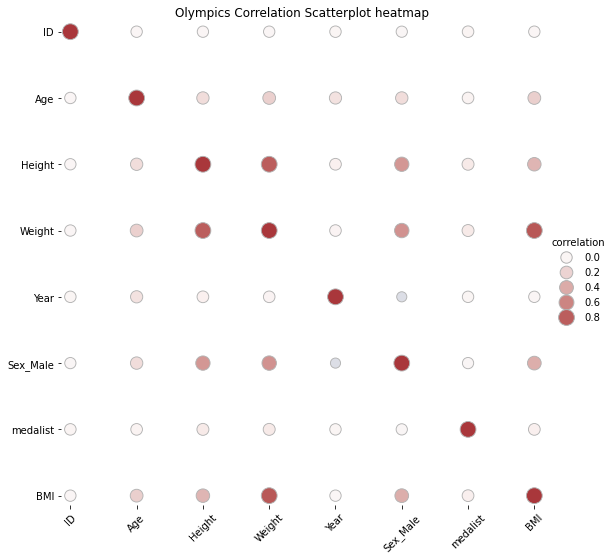

In [4]:
explore.correlation_heatmap(train)

## Correlation Heatmap Takeaways
- There are no negative correlation in this dataset.
- There does not appear to be any strong correlations with the current features.

# What athlete has the most medals?

In [5]:
explore.athlete_most_medals(df)

                              ID    Age  Height  Weight   Year  Sex_Male  \
Name                                                                       
Michael Fred Phelps, II  2832180  726.0  5790.0  2730.0  60276        30   

                         medalist    BMI  
Name                                      
Michael Fred Phelps, II        28  333.0  


# What age bin had the most medals?

In [6]:
explore.agebin_most_medals(df)

                  ID        Age      Height        Weight       Year  \
AgeBins                                                                
20s      12145078665  4300448.0  25877897.0  1.039639e+07  352182960   

         Sex_Male  medalist        BMI  
AgeBins                                 
20s        131852     27545  1499674.8  


# Who are the top performing teams? What team has the most medals?

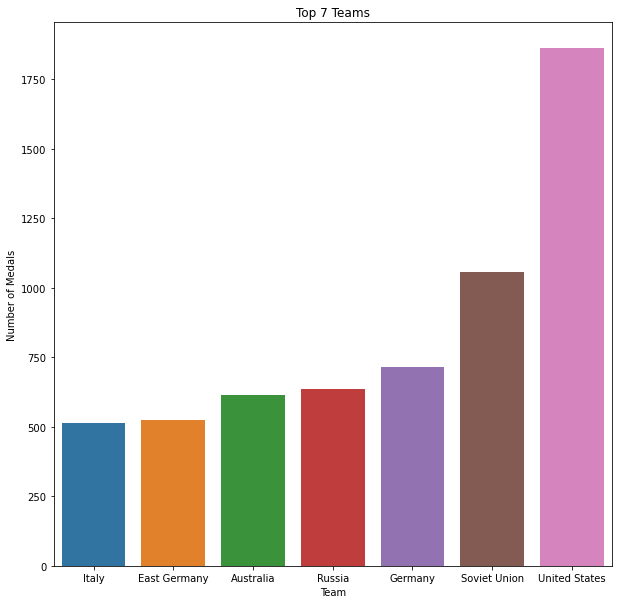

In [7]:
explore.barplot(train)

## Bar Plot Takeaways
- The United States team had the most medals.
- The United Stats has more then double the medals of any other team except the Soviet Union.

## Is there a relationship between Medalists and Males?

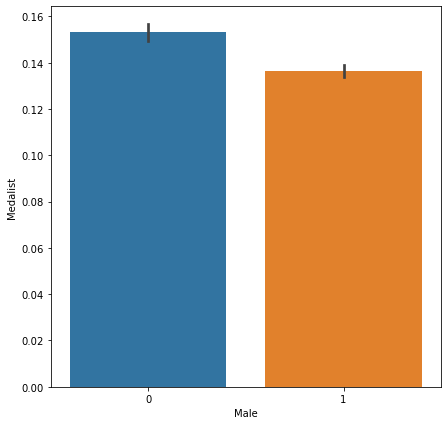

In [8]:
explore.barplot_medalist_male(train)

## Barplot Takeaways
- Males and Females seem to have a similar amount of medalists.

___

### Stats Test for Bar Plot (Chi Square Test)
- $H_0$:Medalists and being male are independent
- $H_a$:There is a relationship between medalists and being male
- Alpha = 0.05

In [9]:
explore.barplot_medalist_male_stat(train)

We reject the null hypothesis that Medalists and being male are independent
There is a relationship between medalists and being male
P-Value 1.6278636511864776e-13
Chi2 54.41
Degrees of Freedom 1


### Stats Test Takeaways
- There is in fact a relationship between medalists and being male.

# Is there a significant difference in the average age for different medals? 

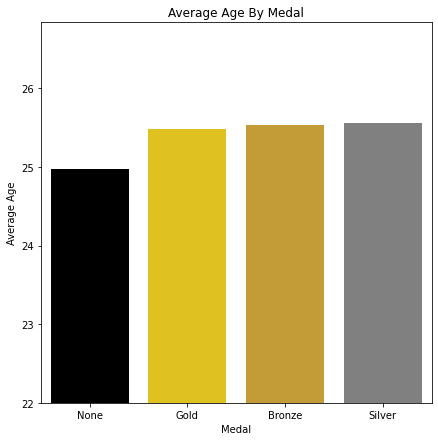

In [10]:
explore.barplot_average_age_by_medal(train)

## Barplot Takeaways
- Athletes with no medals have the lowest average age.
- Athletes with silver medals have the highest average age. 
- There is no significant difference in the average age for different medals.

<hr style="border-top:5px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:5px solid Silver; margin-top: 0px; margin-bottom: 0px">
<hr style="border-top:5px solid #DC9233; margin-top: 0px; margin-bottom: 0px">

# Modeling

<hr style="border-top:5px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:5px solid Silver; margin-top: 0px; margin-bottom: 0px">
<hr style="border-top:5px solid #DC9233; margin-top: 0px; margin-bottom: 0px">

In [11]:
model.baseline_acc(train)

Baseline Accuracy 86.0 %


In [12]:
X_train, y_train, X_validate, y_validate, X_test, y_test = model.data_split(train, validate, test)

In [13]:
model.decision_tree_train(X_train, y_train)

Decision Tree: max_depth=7, max_features=2, min_samples_leaf=4, criterion="entropy"
-----------------------------------------
Model stats:
Accuracy: 0.86
True Positive Rate: 0.00
False Positive Rate: 0.00
True Negative Rate: 1.00
Flase Negative Rate: 1.00
Precision: 0.80
Recall: 0.00
f1 score: 0.00
Positive support: 14995
Negative support: 90558
-----------------------------------------


In [14]:
model.knn_train(X_train, y_train)

KNN: leaf_size=2, n_neighbors=6, weights="uniform"
-----------------------------------------
Model stats:
Accuracy: 0.86
True Positive Rate: 0.01
False Positive Rate: 0.00
True Negative Rate: 1.00
Flase Negative Rate: 0.99
Precision: 0.32
Recall: 0.01
f1 score: 0.02
Positive support: 14995
Negative support: 90558
-----------------------------------------
